# Blue Whale Heart Rates

By how much do blue whale heart rates change when they dive down to find food? 

The file `blue-whale-heart-rates.csv` contains heart rate data (measured in beats per minute) for blue whales. The data captures the dynamics of their heart rates as they dive over one hundred meters deep to forage for food. The heart rate measurements are taken approximately every 10 seconds during 8 separate dives.

### Dive Phases
The data records the heart rates corresponding to different dive states:
1. Descent: The whale begins its dive, descending into the depths.
2. Lunging: The whale opens its mouth and lunges upward, engulfing prey and water.
3. Filtering: After lunging, the whale sinks slightly and filters out water to retain food.
4. Ascent: The whale returns to the surface to breathe, marking the end of a dive.
5.  Surface: The blue whale is now on the surface (upper 5 meters)

The lunging and filtering process may occur multiple times on a single dive. The next dive cycle begins with another descent.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('blue-whale-heart-rates.csv')
df.head()


,timestamp,heart_rate,dive_id,dive_phase
0,8/27/18 17:10:10,NaN,2,descent
1,8/27/18 17:10:22,5.24,2,descent
2,8/27/18 17:10:31,6.55,2,descent
3,8/27/18 17:10:40,NaN,2,descent
4,8/27/18 17:10:48,NaN,2,descent


* The average heart rates for each dive phase

In [2]:
dive_phases = df.groupby('dive_phase')['heart_rate'].mean()
dive_phases

dive_phase
ascent     20.433318
descent     7.473607
filter      6.561053
lunge       9.773529
surface    32.546041
Name: heart_rate, dtype: float64

* Convert the timestamp column to datetime format

In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.info()   # To verify

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   timestamp   1087 non-null   datetime64[ns]
 1   heart_rate  730 non-null    float64       
 2   dive_id     1087 non-null   int64         
 3   dive_phase  1087 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 34.1+ KB


/var/folders/yr/1zq8t0xn47v5vkb50984lgjw0000gp/T/ipykernel_39231/789290900.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['timestamp'] = pd.to_datetime(df['timestamp'])


* For each dive_id, identify the earliest timestamp for the descent phase

In [4]:
descents = df.query('dive_phase == "descent"')
earliest_time_by_id = descents.groupby('dive_id')['timestamp'].min()
earliest_time_by_id

# Same, but for the latest timestamp
ascents = df.query('dive_phase == "ascent"')
latest_time_by_id = ascents.groupby('dive_id')['timestamp'].max()
latest_time_by_id

dive_id
2    2018-08-27 17:22:36
3    2018-08-27 17:37:52
4    2018-08-27 17:49:46
5    2018-08-27 18:01:46
7    2018-08-27 18:22:56
10   2018-08-27 18:53:35
11   2018-08-27 19:13:41
13   2018-08-27 19:28:12
Name: timestamp, dtype: datetime64[ns]

- Compute the `dive_duration` by subtracting the start of the descent from the end of the ascent, then convert this duration to minutes (`dt.total_seconds() / 60`).
- Store the results in a new dataframe with 2 columns: `dive_id` and `dive_duration`.

In [25]:
# Display diving duration for each dive_id
dive_duration = latest_time_by_id - earliest_time_by_id 
dive_duration = dive_duration.dt.total_seconds() / 60
dive_duration

# Store the result in a new dataframe
new_df = pd.DataFrame(dive_duration)
rename = {
    'index' : 'dive_id',
    'timestamp' : 'dive_duration'
}
new_df = new_df.rename(columns=rename).reset_index()
new_df

,dive_id,dive_duration
0,2,12.433333
1,3,12.400000
2,4,9.000000
3,5,9.616667
4,7,11.216667
5,10,11.016667
6,11,16.400000
7,13,10.916667


- Identify the maximum heart rate recorded at the surface after each dive.

In [ ]:
surfaces = df.query('dive_phase == "surface"')
surfaces_dives = surfaces.groupby('dive_id')['heart_rate'].max()
surfaces_dives

dive_id
2     35.50
3     35.29
4     34.48
5     33.90
7     33.52
10    35.29
11    38.22
13    34.88
Name: heart_rate, dtype: float64

- Store the results in a new dataframe with 2 columns: `dive_id` and `max_surface_heart_rate`

In [71]:
heart_df = pd.DataFrame(surfaces_dives) 
rename2 = {
    'index': 'dive_id',
    'heart_rate': 'max_surface_heart_rate'
}
heart_df = heart_df.rename(columns=rename2).reset_index()
heart_df

,dive_id,max_surface_heart_rate
0,2,35.50
1,3,35.29
2,4,34.48
3,5,33.90
4,7,33.52
5,10,35.29
6,11,38.22
7,13,34.88


- Merge the dive duration and max surface heart rate dataframes.

In [73]:
duration_n_heart = new_df.merge(heart_df)
duration_n_heart

,dive_id,dive_duration,max_surface_heart_rate
0,2,12.433333,35.50
1,3,12.400000,35.29
2,4,9.000000,34.48
3,5,9.616667,33.90
4,7,11.216667,33.52
5,10,11.016667,35.29
6,11,16.400000,38.22
7,13,10.916667,34.88


- Generate a scatter plot with dive duration on the x-axis and maximum surface heart rate on the y-axis to illustrate their relationship.

Text(0.5, 0, 'dive duration (min)')

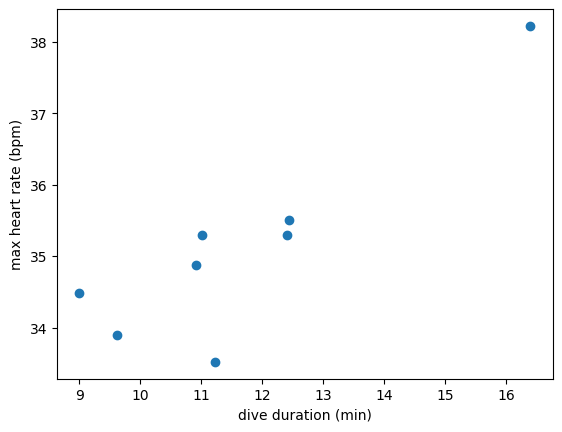

In [79]:
import matplotlib.pyplot as plt 

x = duration_n_heart['dive_duration']
y = duration_n_heart['max_surface_heart_rate']

plt.scatter(x,y)
plt.ylabel('max heart rate (bpm)')
plt.xlabel('dive duration (min)')